C:\Users\91738\AppData\Local\Temp\ipykernel_17224\1392363621.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'] = le_gender.fit_transform(X['Gender'])
C:\Users\91738\AppData\Local\Temp\ipykernel_17224\1392363621.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Occupation'] = le_occupation.fit_transform(X['Occupation'])
C:\Users\91738\AppData\Local\Temp\ipykernel_17224\1392363621.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

Confusion Matrix:
[[128  69]
 [ 65  38]]
Accuracy: 0.5533333333333333


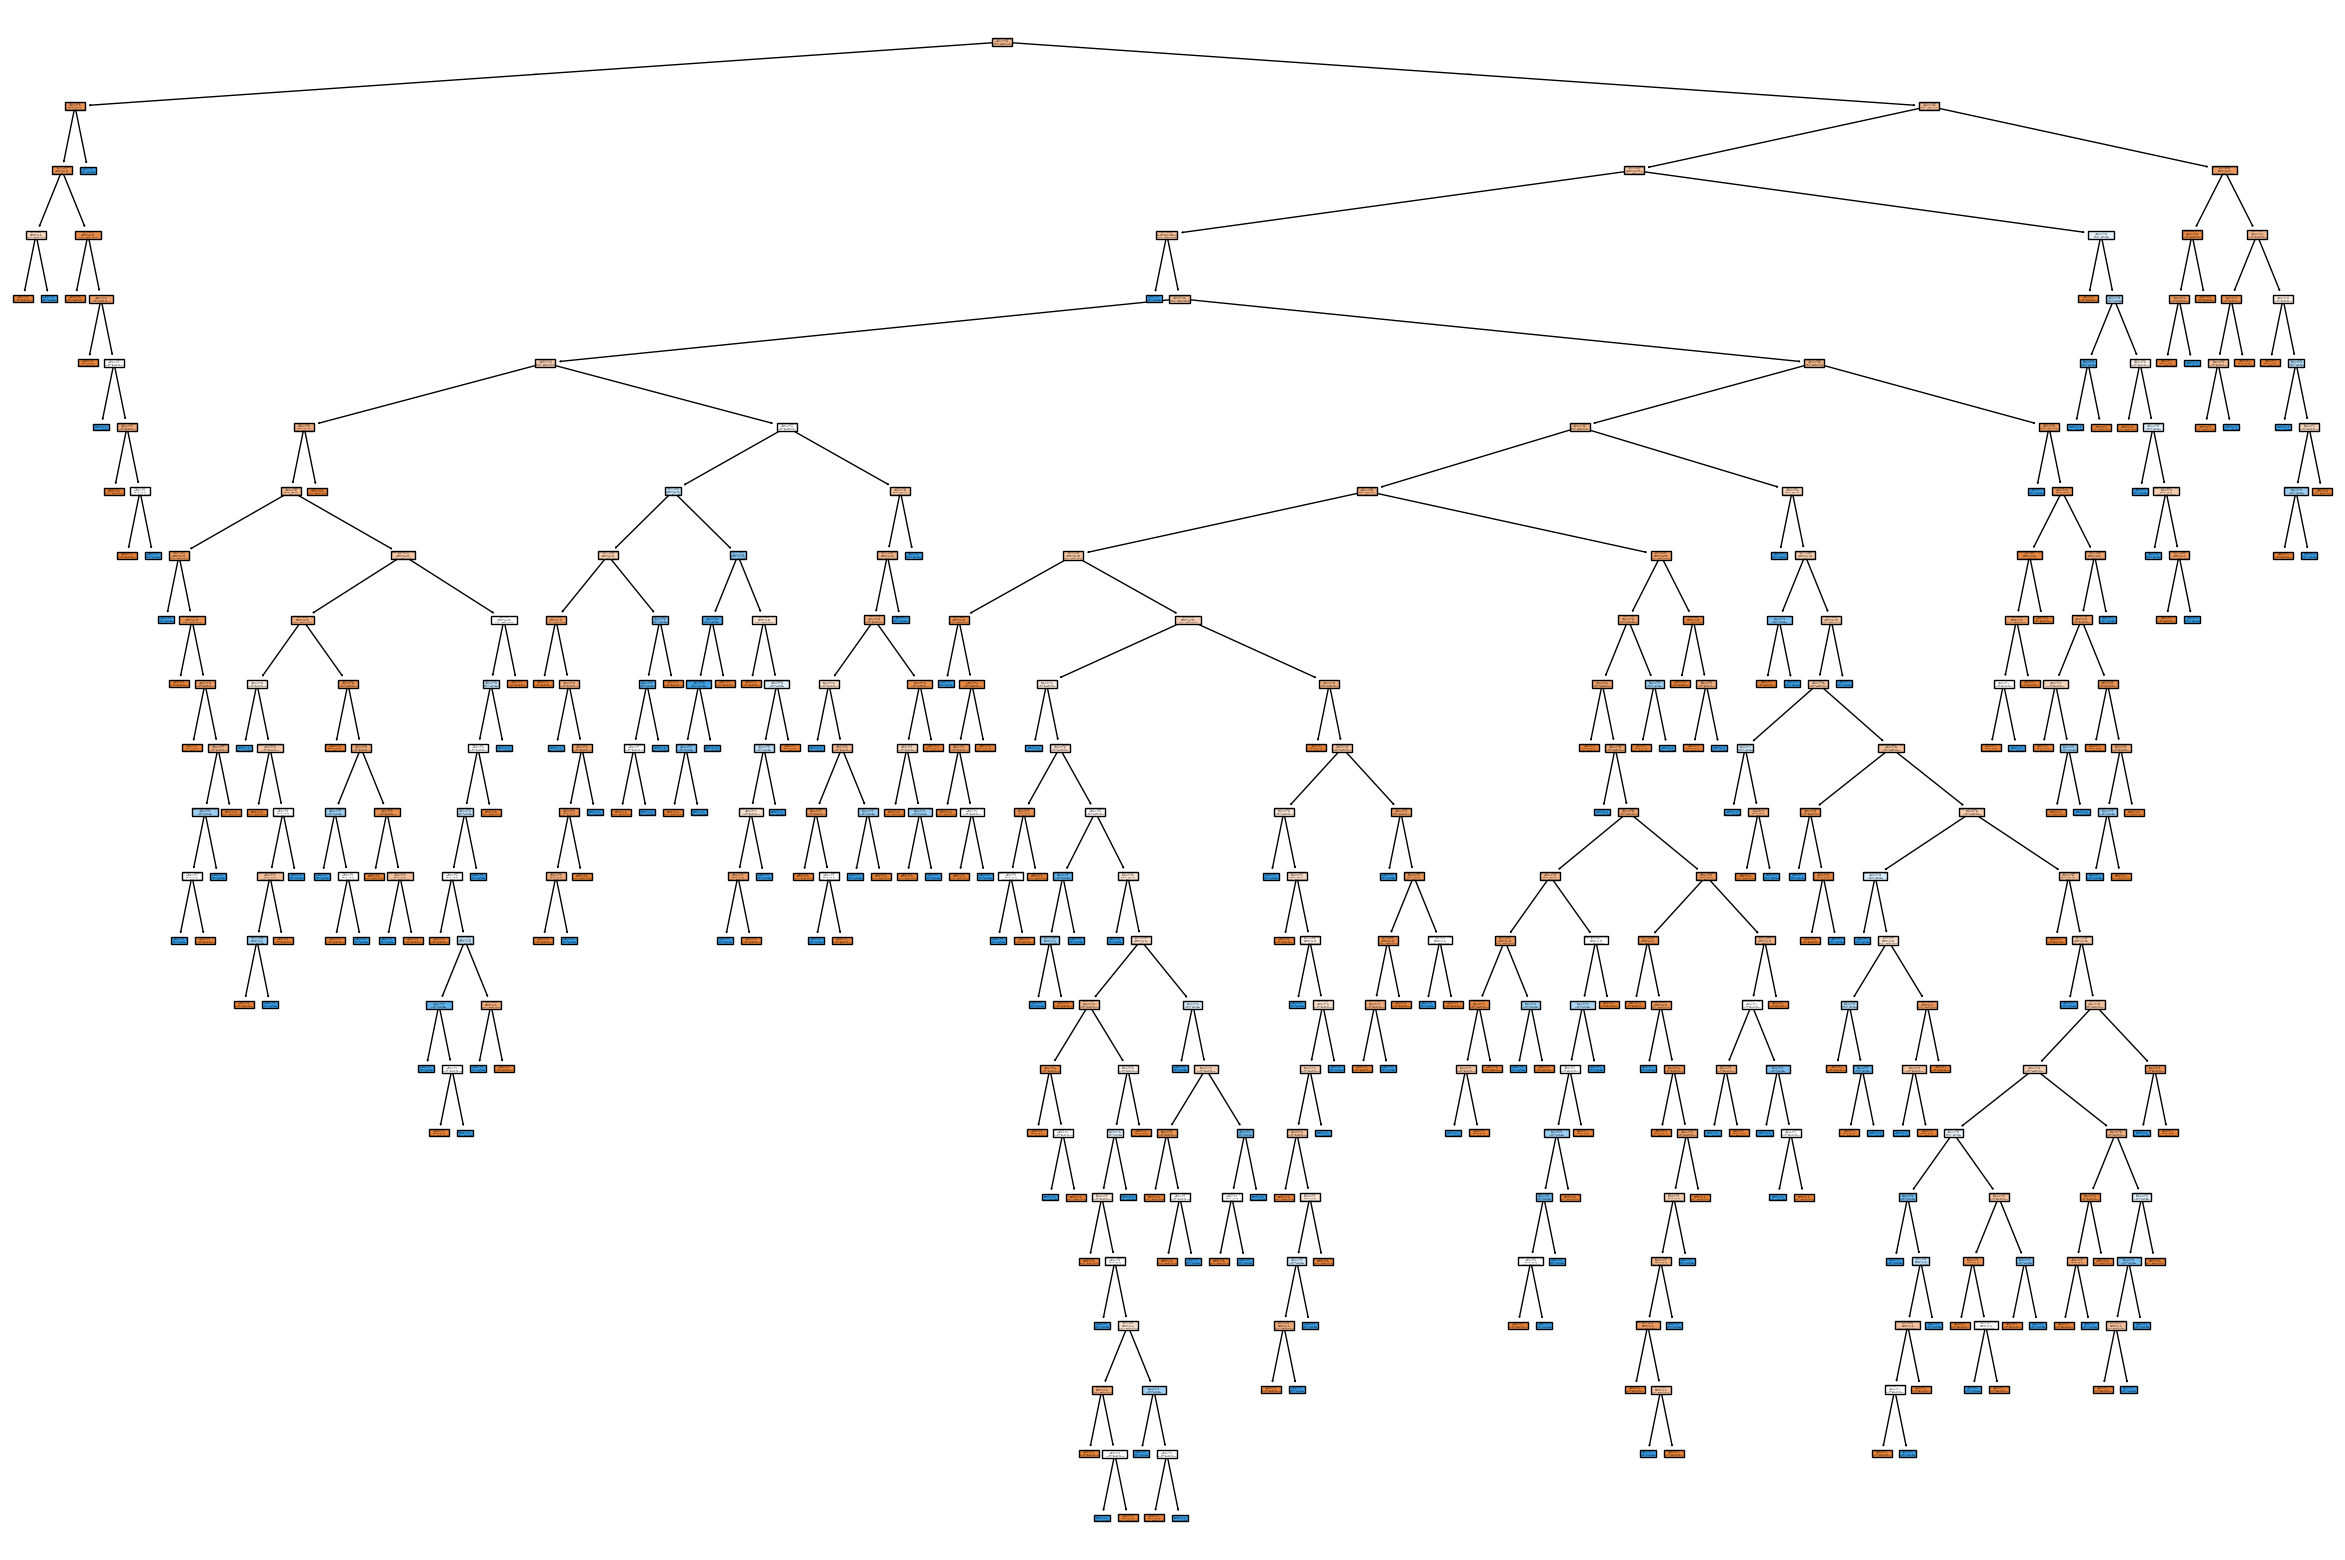

In [21]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('laptop_buying_data.csv')

# Feature selection from the loaded dataset
X = df[['Age', 'Gender', 'Occupation', 'Income', 'Brand Preference', 'Previous Purchases']]
y = df['Purchase Intention']  # You don't need double brackets here, just one

# Encode categorical features
le_gender = LabelEncoder()
le_occupation = LabelEncoder()
le_brand = LabelEncoder()

X['Gender'] = le_gender.fit_transform(X['Gender'])
X['Occupation'] = le_occupation.fit_transform(X['Occupation'])
X['Brand Preference'] = le_brand.fit_transform(X['Brand Preference'])

# Split the data for training and testing purposes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the model
gini_model = DecisionTreeClassifier(criterion="gini", random_state=42)

# Train the model
gini_model.fit(X_train, y_train)

# Predict using the model
y_pred = gini_model.predict(X_test)

# Confusion Matrix
confusionMatrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusionMatrix)

# Finding the Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#we need to plot the tree
plt.figure(figsize=(30,20))
tree.plot_tree(gini_model , filled=True , feature_names=X.columns, class_names=['Not Purchase', 'Purchase'])
plt.show()